optimize > solve > solving 22 dof system to machine precision using direct solver
optimize > solve > solver returned with residual 0e+00
optimize > constrained 22/64 dofs
optimize > optimum value 0.00e+00
optimize > solve > solving 64 dof system to machine precision using direct solver
optimize > solve > solver returned with residual 6e-18
optimize > constrained 64/64 dofs
optimize > optimum value 0.00e+00


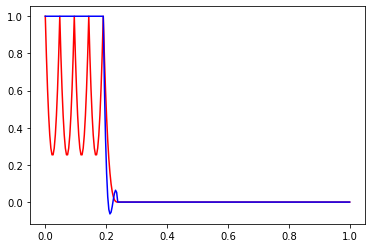

In [75]:
import nutils as ntl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

degree = 3 # ONLY VALID FOR LINEARS
nelems = 22
topo, geom = ntl.mesh.rectilinear([np.linspace(0,1, nelems)])
ns = ntl.function.Namespace()
ns.x = geom
ns.N = topo.basis('bernstein', degree = degree)
ns.u = 'N_i ?dofs_i'
ns.pi = np.pi
badbnd, badbnd2 = ntl.function.partition('x_i' @ns, .2)
ns.badbnd = badbnd[0]
ns.f = topo.indicator(topo[0:int(nelems/5)])# # ntl.function.piecewise('x_0' @ns, [0.2], 3, -1)
ns.g = np.nan 

sqr = topo.boundary.integral('(u - badbnd )^2 d:x' @ns, degree = degree * 2) 
sqr += topo.interfaces.integral(' (u - badbnd)^2 d:x' @ns, degree = degree * 2) #topo.integral(' (u - badbnd)^2 d:x' @ns, degree = degree * 2)
#sqr += topo.integral('u^2 d:x' @ns, degree = degree * 2)
cons = ntl.solver.optimize('dofs', sqr, droptol= 1e-15)

for i in range(len(cons)):
    if np.isnan(cons[i]) == True:
        cons[i] = 0

sqr_nodal = topo.integral(' (u - badbnd)^2 d:x' @ns,  ischeme='bezier4') # BEZIER 2 SCHEME
cons_nodal = ntl.solver.optimize('dofs', sqr_nodal, droptol= 1e-15)

bezier = topo.sample('bezier', 14)
x = bezier.eval('x_i' @ns)
u = bezier.eval('u ' @ns, dofs = cons)
u_nodal = bezier.eval('u' @ns, dofs = cons_nodal)
f = bezier.eval('f' @ns)

#plt.plot(x, f)
plt.plot(x, u, 'r' ,  x, u_nodal, 'b')#, x, np.sin(2 * np.pi * x), '.')

optimize > solve > solving 45 dof system to machine precision using direct solver
optimize > solve > solver returned with residual 6e-17
optimize > constrained 45/45 dofs
optimize > optimum value 4.44e-16
45
optimize > solve > solving 45 dof system to machine precision using direct solver
optimize > solve > solver returned with residual 1e-15
optimize > constrained 45/45 dofs
optimize > optimum value 2.16e-03


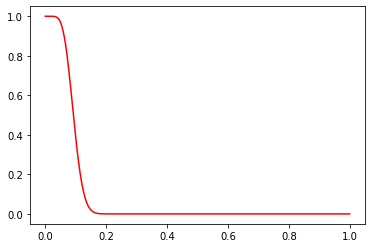

In [54]:
import nutils as ntl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

degree = 15 # ONLY VALID FOR LINEARS
nelems = 30
topo, geom = ntl.mesh.rectilinear([np.linspace(0,1, nelems+1)])
ns = ntl.function.Namespace()
ns.x = geom
ns.N = topo.basis('spline', degree = degree)
ns.u = 'N_i ?dofs_i'
ns.pi = np.pi
badbnd, badbnd2 = ntl.function.partition('x_i' @ns, .2)
ns.badbnd = badbnd[0]
ns.f = topo.indicator(topo[0:int(nelems/5)])# # ntl.function.piecewise('x_0' @ns, [0.2], 3, -1)

sqr = topo.integral(' (u - 1)^2 d:x' @ns, degree = degree * 2)
cons = ntl.solver.optimize('dofs', sqr, droptol= 1e-15)
print(len(cons))
adj = np.zeros(len(cons),)
adj[int(0.2 * len(cons)):] = -1
cons = cons + adj
sqr_nodal = topo.integral(' (u - badbnd)^2 d:x' @ns,  ischeme='bezier17') # BEZIER 2 SCHEME
cons_nodal = ntl.solver.optimize('dofs', sqr_nodal, droptol= 1e-15)

bezier = topo.sample('bezier', 17)
x = bezier.eval('x_i' @ns)
u = bezier.eval('u ' @ns, dofs = cons)
u_nodal = bezier.eval('u' @ns, dofs = cons_nodal)
f = bezier.eval('f' @ns)

plt.plot(x, u, 'r' )#,  x, u_nodal, 'b')

## DOF interpolation function



optimize > constrained 19/19 dofs
optimize > optimum value 0.00e+00


<IPython.core.display.Javascript object>


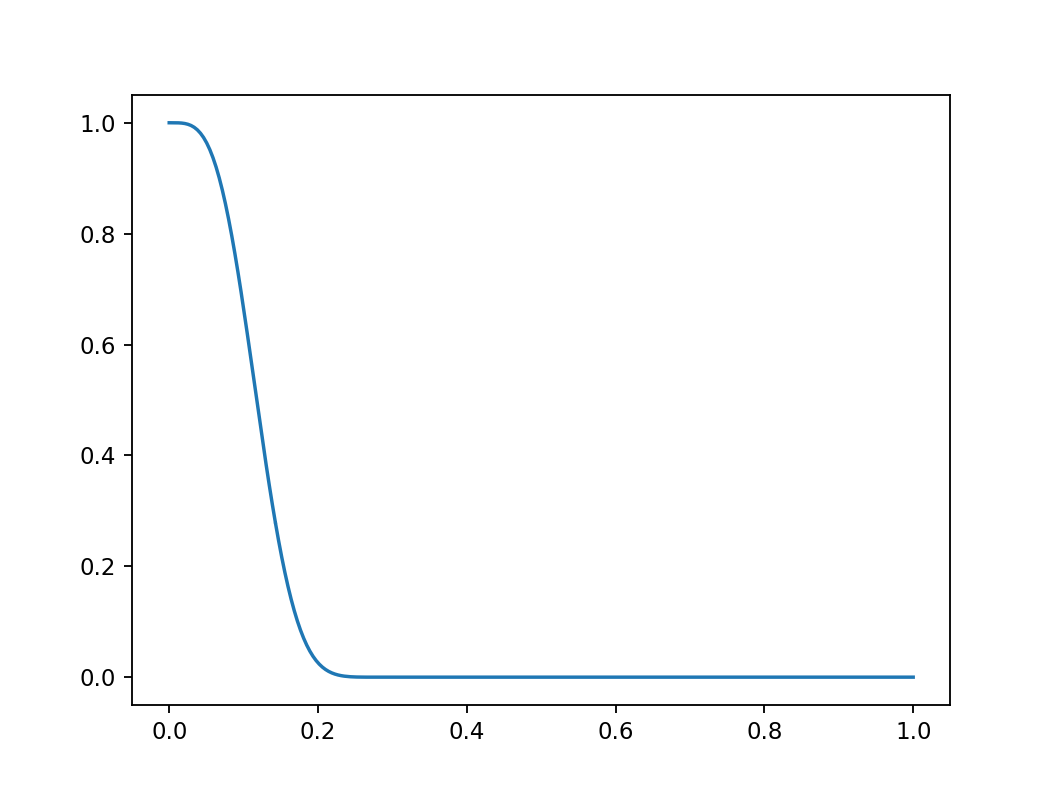

(19,)
(19,)


In [11]:
import nutils as ntl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook


degree = 5 #degree of basis functions
nelems = 14 #number of elements along edge of unit square
etype = 'square' #square meshes

              #, np.linspace(0,1, ny) ])
topo, geom =  ntl.mesh.rectilinear([np.linspace(0,1, nelems+1)])#unitsquare(nelems, etype) 
ns = ntl.function.Namespace()
ns.x = geom
ns.basis = topo.basis('spline', degree = degree)
ns.u = 'basis_i ?dofs_i'


argtopo = topo
sqr = argtopo.integral( '(u - 0)^2 d:x' @ ns,degree = degree*2 )  #ischeme = 'bezier6')#
cons = ntl.solver.optimize('dofs', sqr, droptol=1e-15)#this applies the boundary condition to u

consindex = np.array([])
#ite = np.append([1, 4, 5, 6], ite)
for i in range(len(cons)):
    if np.isfinite(cons[i]) == True :
        consindex = np.append(consindex, [i])
        
consindex = consindex.astype(int)

#controlpoints = np.zeros(len(consindex)) #control points go here
for i in range(int(0.2 * len(consindex)) + 1):
    cons[consindex[i]] = 1 

#print(cons)
bezier = argtopo.sample('bezier', 18)# degree+1)        
argcoords = bezier.eval('x_i' @ns)      
#print(argcoords.shape)        
ubnd = bezier.eval('u' @ns, dofs = cons)

plt.plot(argcoords, ubnd)
#res_list = [test_list[i] for i in index_list]         
        

print(consindex.shape)
print(cons.shape)






optimize > constrained 25/625 dofs
optimize > optimum value 0.00e+00
optimize > solve > solving 73 dof system to machine precision using direct solver
optimize > solve > solver returned with residual 7e-17
optimize > constrained 73/625 dofs
optimize > optimum value 1.31e-03
solve > solving 529 dof system to machine precision using direct solver
solve > solver returned with residual 6e-17


<IPython.core.display.Javascript object>


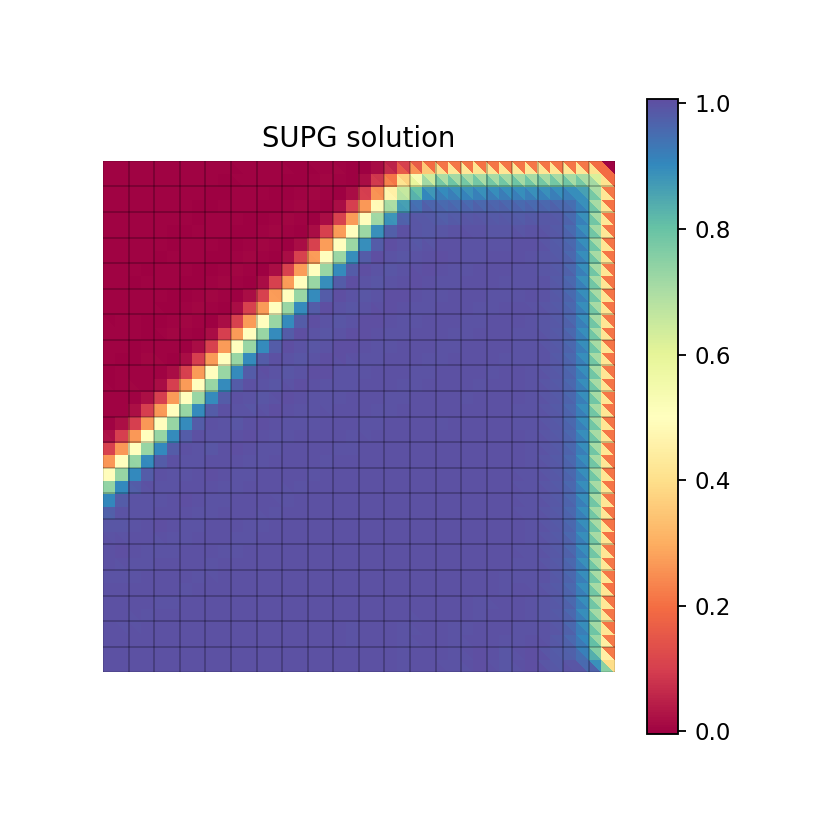

<IPython.core.display.Javascript object>


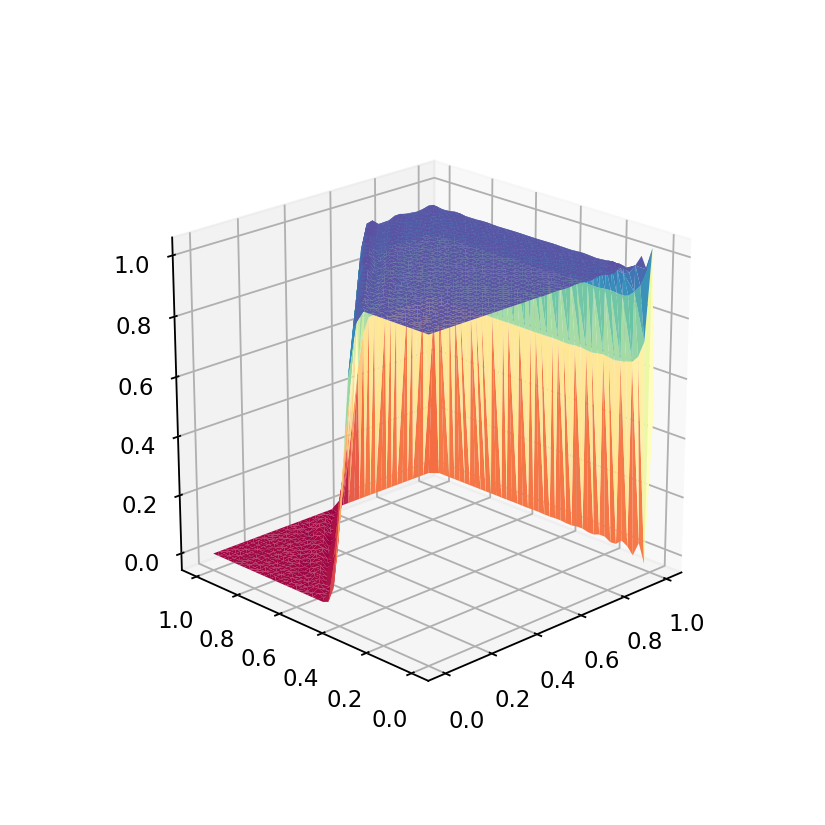

In [22]:
import nutils as ntl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook


degree = 5 #degree of basis functions
nelems = 20 #number of elements along edge of unit square
etype = 'square' #square meshes

theta = np.pi/4
topo, geom =  ntl.mesh.unitsquare(nelems, etype) #rectilinear([np.linspace(0,1, nx), np.linspace(0,1, ny) ])
ns = ntl.function.Namespace()
ns.x = geom
ns.a= np.array([np.cos(theta), np.sin(theta)])
ns.kappa = 1e-6
ns.basis = topo.basis('spline', degree = degree)
ns.u = 'basis_i ?dofs_i'

#element intrinsic time scale
ns.h = np.sqrt(2/nelems**2) #mesh size parameter
ns.anorm = '(a_i a_i)^.5'
ns.tau = 'h / (2 anorm)'

##################################### HELPER FUNCTION ###############################################
def consindex(argtopo):  #outputs indices of dofs vector that need constraining
    sqr = argtopo.integral( '(u - 0)^2 d:x' @ ns,degree = degree*2 ) 
    cons = ntl.solver.optimize('dofs', sqr, droptol=1e-15) #puts zeros on constrainable dof
    
    consindex = np.array([])
    for i in range(len(cons)):
        if np.isfinite(cons[i]) == True :
            consindex = np.append(consindex, [i])      
    return consindex.astype(int)
###################################################################################################

#Dirichlet boundary condition
#badbnd, badbnd2 = ntl.function.partition('x_i' @ns, .2) #This creates a partition of unity on each axes at x_i = 0.2
#ns.badbnd = badbnd[1] 

consind = consindex(topo.boundary['left'])
sqr = topo.boundary['bottom'].integral('(u - 1)^2 d:x' @ ns, degree = degree*2)
#sqr += topo.boundary['left'].integral( '(u - badbnd)^2 d:x' @ ns, degree = degree*2 )
sqr += topo.boundary['right'].integral( '(u - 0)^2 d:x' @ ns, degree = degree*2 )
sqr += topo.boundary['top'].integral( '(u - 0)^2 d:x' @ ns, degree = degree*2 )
cons = ntl.solver.optimize('dofs', sqr, droptol=1e-15) #this applies the boundary condition to u

for i in range(int(0.4 * len(consind))):
    cons[consind[i]] = 1 
for i in range(int(.4 * len(consind)), len(consind)):
    cons[consind[i]] = 0 

    
#residual
res = topo.integral( '(kappa basis_i,j u_,j  - u basis_i,n a_n) d:x' @ ns, degree = degree * 2) 
res += topo.integral( 'tau a_k basis_i,k (-kappa u_,jj + a_n u_,n)  d:x' @ ns, degree = degree * 2) 

lhs = ntl.solver.solve_linear('dofs', res, constrain= cons)

bezier = topo.sample('bezier', 3)
x = bezier.eval('x_i' @ ns)
u = bezier.eval('u' @ ns, dofs = lhs)

#ntl.export.triplot('ADSM_SUPG.png', x, u, tri=bezier.tri, hull=bezier.hull)
fig = plt.figure(figsize= (5, 5))
ax = fig.add_subplot(111, aspect= 'equal')
im = ax.tripcolor(x[:,0], x[:, 1], bezier.tri, u, cmap= plt.cm.Spectral)
fig.colorbar(im)
ax.autoscale(enable= True, axis = 'both', tight = 'True')
ax.set_title('SUPG solution')
ax.add_collection(collections.LineCollection(x[bezier.hull], colors='k', linewidths= .1))
plt.axis('off')

fig2 = plt.figure(figsize= (5,5))
ax2 = fig2.add_subplot(111, projection ='3d')
ax2.plot_trisurf( x[:, 0], x[:,1], u, cmap=plt.cm.Spectral)

In [13]:
#baze =[ns.basis[0] for i in consindex]
a = [np.nan, np.nan, np.nan]
for i in range(len(a)):
    a[i] = i
#b = bezier.eval('basis_i' @ns)
#plt.plot(b, '') 
print(a)

[0, 1, 2]


In [62]:
help(topo)

Help on StructuredTopology in module nutils.topology object:

class StructuredTopology(Topology)
 |  StructuredTopology(root, axes, nrefine=0, bnames=(('left', 'right'), ('bottom', 'top'), ('front', 'back')))
 |  
 |  structured topology
 |  
 |  Method resolution order:
 |      StructuredTopology
 |      Topology
 |      nutils.types.Singleton
 |      nutils.types.Immutable
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, root, axes, nrefine=0, bnames=(('left', 'right'), ('bottom', 'top'), ('front', 'back')))
 |      constructor
 |  
 |  __len__(self)
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  __str__(self)
 |      string representation
 |  
 |  basis_spline(self, degree, removedofs=None, knotvalues=None, knotmultiplicities=None, continuity=-1, periodic=None)
 |      spline basis
 |  
 |  basis_std(self, *args, **kwargs)
 |      bernstein shape functions
 |  
 |  getitem(self, item)
 |  
 |  locate(self, geom, coords, *, eps=0, tol=None, 

In [67]:
#help(ntl.function.piecewise)
print(max(np.inf, np.nan))
#help(np.inf)

inf
